In [3]:
import torch
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import ast

In [4]:
# Đọc dữ liệu từ file CSV
df = pd.read_csv('data.csv')
    
# Chọn các cột 'x1', 'x2', 'x3', 'x4', 'x5' làm đầu vào và 'y' làm đầu ra
x_data = df[['x1', 'x2', 'x3', 'x4', 'x5']]
y_data = df['y']

# Khởi tạo danh sách để lưu trữ dữ liệu đầu vào dưới dạng tensors
x_train = []

# Lặp qua từng hàng trong x_data
for index in range(len(x_data)):
    # Lấy hàng thứ index từ DataFrame
    row = x_data.iloc[index]
    # Chuyển đổi từng giá trị trong hàng thành list
    x_values = [ast.literal_eval(val) for val in row.values]
    # Thêm tensor tương ứng vào danh sách x_train
    x_train.append(torch.tensor(x_values, dtype=torch.float32))

# Chuyển đổi dữ liệu đầu ra thành tensor PyTorch
y_train = torch.tensor(y_data.values, dtype=torch.long)

# Tạo tensor từ danh sách các tensors đầu vào
X_train = torch.stack(x_train)

# In ra kích thước của tensors đầu vào và đầu ra
print("x_train:", X_train.shape)
print("y_train:", y_train.shape)

x_train: torch.Size([26846, 5, 10])
y_train: torch.Size([26846])


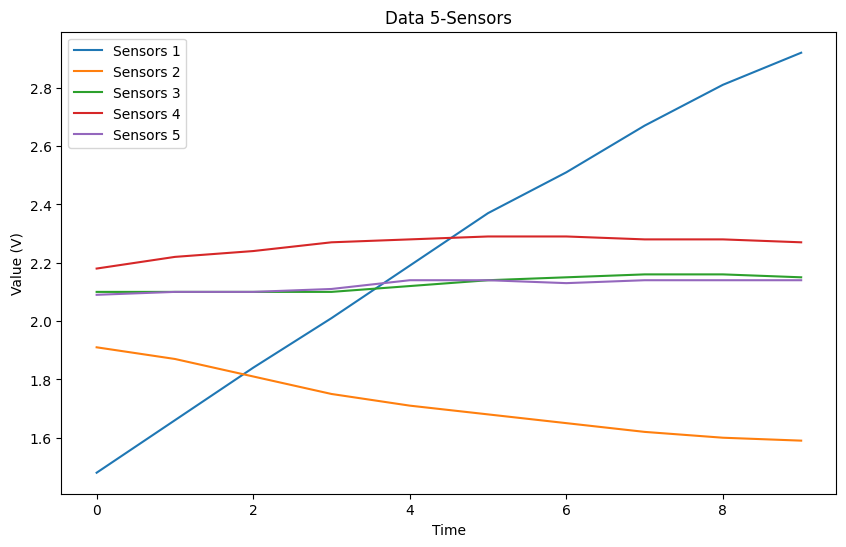

In [5]:
# Chọn một mẫu ngẫu nhiên từ tập dữ liệu huấn luyện
num_samples = y_train.shape[0]
sample_index = np.random.randint(0, num_samples)

# Trích xuất dữ liệu và nhãn của mẫu đã chọn
sample_data = X_train[sample_index].numpy()

# Định nghĩa các hằng số để dễ đọc hơn
NUM_SENSORS = 5
SENSOR_LABEL_FORMAT = "Sensors {}"

plt.figure(figsize=(10, 6))
# Vẽ dữ liệu
for i in range(NUM_SENSORS):
    plt.plot(sample_data[i], label=SENSOR_LABEL_FORMAT.format(i+1))

# Thêm tiêu đề, nhãn và chú thích
plt.title('Data 5-Sensors')
plt.xlabel('Time')
plt.ylabel('Value (V)')
plt.legend()
plt.show();


In [6]:
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader

In [7]:
# Định nghĩa lớp mô hình CNN 1D
class MyCNN1D(nn.Module):
    def __init__(self):
        super(MyCNN1D, self).__init__()
        
        # Lớp đầu tiên
        self.conv1 = nn.Conv1d(5, 128, kernel_size=(3, 1), stride=1, padding="valid")
        # Lớp thứ hai
        self.conv2 = nn.Conv1d(5, 256, kernel_size=(3, 1), stride=1, padding="valid")
        # Lớp thứ ba
        self.conv3 = nn.Conv1d(5, 512, kernel_size=(3, 1), stride=1, padding="valid")
        # Lớp thứ tư
        self.conv4 = nn.Conv1d(5, 512, kernel_size=(3, 1), stride=1, padding="valid")
        # Lớp thứ năm
        self.conv5 = nn.Conv1d(5, 1024, kernel_size=(3, 1), stride=1, padding="valid")
        
        # Dropout
        self.dropout = nn.Dropout(p=0.5)
        
        # Fully connected layer
        self.fc = nn.Linear(1024, 36)  # Số lớp đầu ra là 36

    def forward(self, x):

        # Thêm một chiều cho dữ liệu đầu vào
        x = x.squeeze(2)

        # Feedforward qua các lớp convolutional
        x = torch.relu(self.conv1(x))
        x = torch.relu(self.conv2(x))
        x = torch.relu(self.conv3(x))
        x = torch.relu(self.conv4(x))
        x = torch.relu(self.conv5(x))
        
        # Global Max pooling
        x = torch.max_pool1d(x, kernel_size=x.size(-1))
        
        # Dropout
        x = self.dropout(x)
        
        # Flatten
        x = x.view(x.size(0), -1)
        
        # Fully connected layer
        x = self.fc(x)
        
        return x

HMM theem cho vui

In [8]:
x

NameError: name 'x' is not defined

In [9]:
    x_train

[tensor([[2.0700, 2.0700, 2.0700, 2.0700, 2.0600, 2.0400, 2.0300, 2.0200, 2.0000,
          2.0000],
         [2.0500, 2.0600, 2.0700, 2.0800, 2.0800, 2.0800, 2.0800, 2.0800, 2.0900,
          2.0800],
         [2.0400, 2.0300, 2.0300, 2.0300, 2.0400, 2.0300, 2.0100, 2.0200, 2.0100,
          2.0100],
         [2.0500, 2.0400, 2.0500, 2.0600, 2.0500, 2.0400, 2.0300, 2.0400, 2.0500,
          2.0600],
         [2.0600, 2.0600, 2.0500, 2.0600, 2.0600, 2.0700, 2.0600, 2.0600, 2.0500,
          2.0500]]),
 tensor([[1.9800, 1.9700, 1.9600, 1.9600, 1.9300, 1.9200, 1.9100, 1.9000, 1.8900,
          1.8900],
         [2.0900, 2.0900, 2.0900, 2.1000, 2.1000, 2.0900, 2.0900, 2.1000, 2.0800,
          2.1100],
         [2.0000, 2.0100, 2.0100, 2.0300, 2.0100, 2.0000, 2.0000, 1.9900, 1.9900,
          2.0100],
         [2.0500, 2.0400, 2.0500, 2.0500, 2.0400, 2.0400, 2.0400, 2.0400, 2.0300,
          2.0400],
         [2.0500, 2.0600, 2.0700, 2.0600, 2.0600, 2.0600, 2.0600, 2.0700, 2.0700,
       